In [483]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics.pairwise import cosine_similarity


In [466]:
df = pd.read_csv("downloads/netflix_titles.csv")


In [467]:
#Data Cleaning

In [468]:
df.shape #View dataset shape: 7787 rows and 12 columns

(7787, 12)

In [470]:
df.columns=df.columns.str.title() #Convert column names so each word's first letter is a capital letter

In [471]:
df.columns #View column names

Index(['Show_Id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date_Added',
       'Release_Year', 'Rating', 'Duration', 'Listed_In', 'Description'],
      dtype='object')

In [ ]:
df.duplicated() #Check for any duplicate data
df.drop_duplicates(inplace =True, keep='last') #Deletes any dduplicated data

In [499]:
df.isnull().sum() #View number of null values in dataset

Show_Id         0
Type            0
Title           0
Director        0
Cast            0
Country         0
Date_Added      0
Release_Year    0
Rating          0
Duration        0
Listed_In       0
Description     0
dtype: int64

In [473]:
df=df.fillna('Unknown') #Fill Missing/NaN values with 'Unknown'

In [ ]:
#Data Visualisation

<AxesSubplot:title={'center':'Type Frequency'}, xlabel='Type', ylabel='Frequency'>

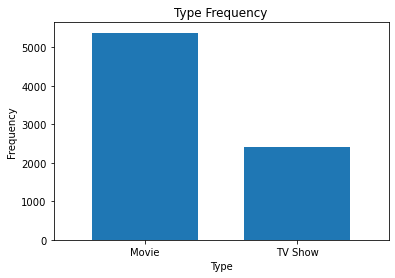

In [484]:
#Comparison of number of movies and tv shows 
df['Type'].value_counts().plot(
    kind='bar',
    width=0.7,     
    title='Type Frequency',
    ylabel='Frequency', 
    xlabel='Type',
    rot = 0)

<AxesSubplot:title={'center':'Release Year Frequency'}, ylabel='Release Date'>

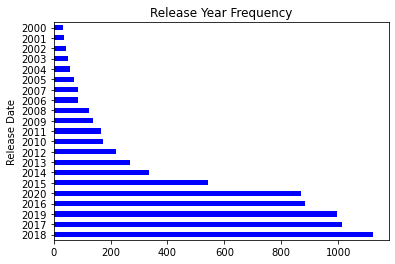

In [580]:
#Release Year
df['Release_Year'].value_counts().head(21).plot(
    kind='barh',
    color='blue',
    title='Release Year Frequency',
    ylabel='Frequency', 
    xlabel='Release Date')

<AxesSubplot:title={'center':'Number of Movies/TV directed by Director'}, ylabel='Director'>

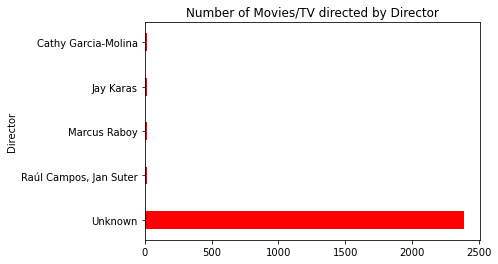

In [486]:
#Director
df['Director'].value_counts().head(5).plot(
    kind='barh',
    width=0.4, 
    color='red',
    title='Number of Movies/TV directed by Director',
    ylabel='Number of Movies/TV Shows', 
    xlabel='Director')

<AxesSubplot:title={'center':'Genre Frequency'}, ylabel='Genre'>

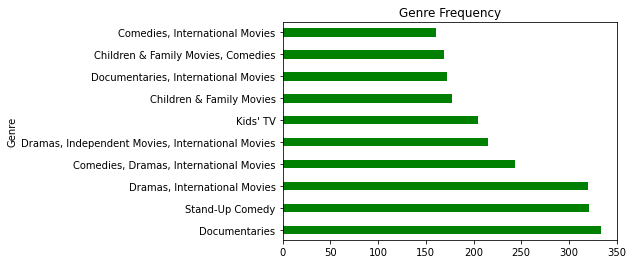

In [517]:
#Genre
df['Listed_In'].value_counts().head(10).plot(
    kind='barh',
    width=0.4, 
    color='green',
    title='Genre Frequency',
    ylabel='Frequency', 
    xlabel='Genre')

<AxesSubplot:title={'center':'Occurrences in Country'}, ylabel='Country of Release'>

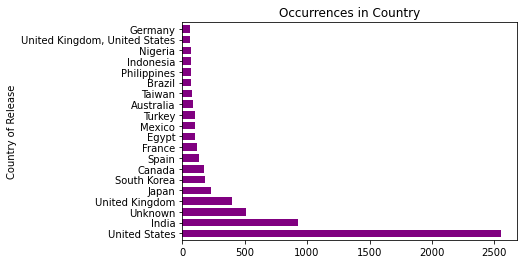

In [568]:
#Country
df['Country'].value_counts().head(20).plot(
    kind="barh",
    width=0.7, 
    color="purple",
    title='Occurrences in Country',
    ylabel='Frequency', 
    xlabel='Country of Release')

<AxesSubplot:title={'center':'Rating Frequency'}, xlabel='Rating', ylabel='Frequency'>

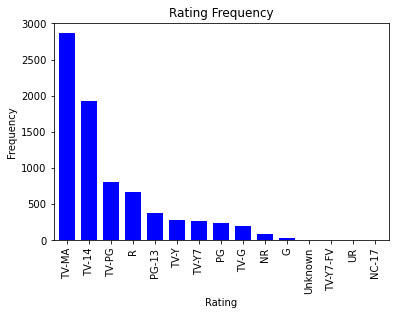

In [562]:
#Rating
df['Rating'].value_counts().plot(
    kind='bar',
    color='blue',
    width=0.7, 
    title='Rating Frequency',
    ylabel='Frequency', 
    xlabel='Rating')

<AxesSubplot:title={'center':'Number of Titles Added in the Months of the Year'}, xlabel='Month Added', ylabel='Frequency'>

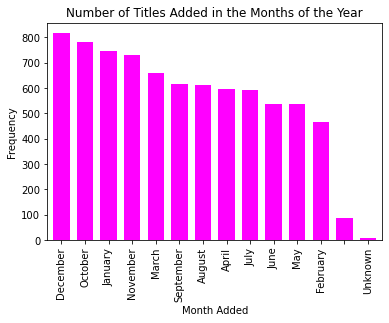

In [567]:
#Months where Movie/TV Show is added
df['Date_Added'].unique()
Date_Added = df['Date_Added'].str.split(' ',expand=True)
Month_Added = Date_Added[0]

Month_Added.value_counts().plot(
    kind='bar',
    width=0.7, 
    color='magenta',
    title='Number of Titles Added in the Months of the Year',
    ylabel='Frequency', 
    xlabel='Month Added')

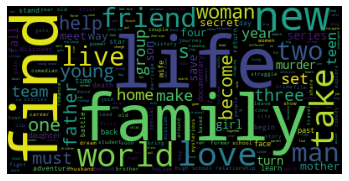

In [490]:
#WordCloud based on Netflix Movie and TV Show Descriptions
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(df['Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

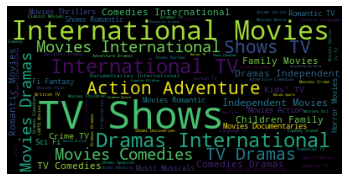

In [507]:
#WordCloud based on categories/genres of Movies and TV Shows
wordcloud = WordCloud().generate(' '.join(df['Listed_In']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [491]:
#Recommender System

In [524]:
#Creates a vectorizer object
tfidf = TfidfVectorizer(stop_words='english') #Removes english stop words 

tfidf_matrix = tfidf.fit_transform(df['Description']) #Creates a tdidf matrux



TfidfVectorizer(stop_words='english')

In [493]:

tfidf_matrix.shape #Prints shape of matrix


(7787, 17905)

In [525]:
#Calculates cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

print('cosine similiarity matrix shape:', cosine_sim.shape)

#Creates index look up on all titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()
#Produces a reverse map of indices and movie titles

cosine_sim #Brief view of the similarity matrix

cosine similiarity matrix shape: (7787, 7787)


array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [556]:
#Recommender system as a function of name of movie/tv series and indices

def recommendations(Title, cosine_sim=cosine_sim):
    #Get the index of the Movie/TV Show matching with the Title
    idx = indices[Title]
    
    #Creates dataframe with similarity scores
    Similarity = list(enumerate(cosine_sim[idx]))

    #Sort recommended list by  similarity scores
    Similarity = sorted(Similarity, key=lambda x: x[1], reverse=True)

    #Recommender system lists 10 recommendations with the highest similarity score
    Similarity = Similarity[1:11] 

    #Get the indices of the similar Movies/TV Shows
    indices2 = [i[0] for i in Similarity] 
   

    #Return the top 10 most similar movies in order starting with the most similar 
    return df['Title'].iloc[indices2].sort_values(ascending=False)


In [557]:
recommendations('Carrie') #Top ten recommendation for the movie Carrie

7414             Victim of Beauty
6785                     The Prom
5062    Rafinha Bastos: Ultimatum
4989                   Prom Night
4007                 Mean Girls 2
2806                     Hormones
2485            Good Morning Call
2084                   F the Prom
1687         Degrassi: Next Class
1651                    Dead Kids
Name: Title, dtype: object

In [558]:
recommendations('Peaky Blinders')

6950                       The Tudors
6783                       The Prison
6585     The Legend of Michael Mishra
6344                         The Fear
6236                    The Con Is On
4953                Power Rangers Zeo
4692                    Our Godfather
4358                   My Stupid Boss
3219    Jonathan Strange & Mr Norrell
1807                              Don
Name: Title, dtype: object